# Other Useful Links

https://webapps1.dot.illinois.gov/WCTB/LbLettingDetail/Index/ead434bc-78d0-4a69-805a-b8aa44cd32f6

https://flexureflow.com/biditem/search/idot/1

https://webapps1.dot.illinois.gov/WCTB/LbLettingDetail/Index/ead434bc-78d0-4a69-805a-b8aa44cd32f6

In [1]:
# Path to the PDF file
pdf_path = r"C:\Users\dane.parks\AppData\Local\Microsoft\Windows\INetCache\Content.Outlook\ZRDOOQQB\215 Press Release.pdf"

In [22]:
import os
import re
import PyPDF2
import camelot

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_pdf_page_count(pdf_path):
    """
    Returns the number of pages in a PDF file.

    Args:
        pdf_path (str): The path to the PDF file.

    Returns:
        int: The number of pages in the PDF, or None if an error occurs.
    """
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            page_count = len(pdf_reader.pages)
            return page_count
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [4]:
get_pdf_page_count(pdf_path)

6

This works for the modern format of the pdfs, but the format changes prior to the  
200th press release

In [5]:
table_areas = ["0,540,1100,30"]
columns = ["60, 200, 360, 475, 590, 680, 800, 860, 925"]

tables = camelot.read_pdf(pdf_path, pages='0', flavor='hybrid', 
                          table_areas=table_areas, columns=columns)

# columns=columns

In [6]:
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,,,,,,,,,,FIRMS
1,Item #,Selected Firm,Proposed Subconsultants,1st Alternate,2nd Alternate,Job #,Project Description,Location,Submitted,Eligible
2,50,"Lochmueller Group, Inc.","CIVIL DESIGN, INC.;","LIN ENGINEERING, LTD.",HUTCHISON,P-99-010-25,IL 146 from IL 127 in,District 9,3,120
3,,,SDI ENGR;,,"ENGINEERING, INC.",,Jonesboro to Old US 51 in,,,
4,,,"TREKK Design Group, LLC;",,,,"Anna, Phase I/II Project,",,,
5,,,"Wi-Skies, LLC;",,,,Union County,,,
6,51,BACON FARMER WORKMAN,"GREENE & BRADFORD, INC., OF SPFLD.;",KASKASKIA ENGINEERING,"HORNER & SHIFRIN, INC.",P-99-011-25,Various Phase I/II Projects,District 9,10,150
7,,ENGR. & TESTNG,HANSON PROFESSIONAL SERVICES INC.;,"GROUP, LLC",,,,,,
8,,,"QUIGG ENGINEERING, INC.;",,,,,,,
9,,,"Strategic Value Solutions, Inc.;",,,,,,,


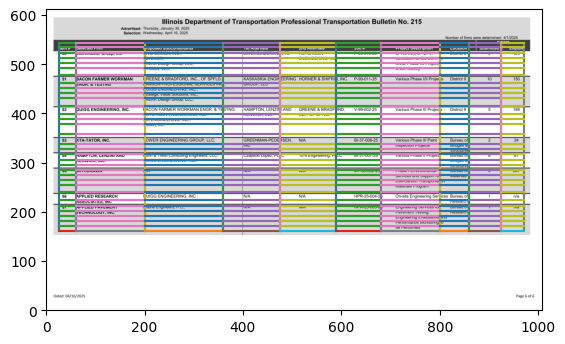

In [7]:
camelot.plot(tables[0], kind='grid')
plt.rcParams["figure.figsize"] = [36, 27]
plt.rcParams["figure.dpi"] = 100
plt.show()

In [8]:
def combine_unique(series):
    return ' '.join(series.dropna().astype(str).unique())


def filter_df(table):
    # Perform some formatting steps on the table, set the headers, change some names
    df = table.df[1:]
    df = df.set_axis(df.iloc[0], axis='columns')
    df = df[1:]
    df = df.reset_index(drop=True)
    df = df.rename(columns={'FIRMS\nEligible': 'Eligible'})
    
    # Replace '\n' with actual newlines in the entire DataFrame
    df = df.replace(r'\n',' ', regex=True)
    
    # Convert 'Item #' to numeric for proper grouping
    df['Item #'] = pd.to_numeric(df['Item #'], errors='coerce')
    
    # Forward fill 'Item #', 'Selected Firm', and 'Job #'
    df[['Item #', 'Selected Firm', 'Job #']] = df[['Item #', 'Selected Firm', 'Job #']].ffill()
    
    # Group by 'Item #' and aggregate other columns, taking the first unique value
    df = df.groupby('Item #', as_index=False).agg({
        'Selected Firm': 'first',
        'Proposed Subconsultants': combine_unique,
        '1st Alternate': combine_unique,
        '2nd Alternate': combine_unique,
        'Job #': 'first',
        'Project Description': combine_unique,
        'Location': combine_unique,
        'Submitted': combine_unique,
        'Eligible': combine_unique,
    })
    
    df = df.replace(r',\s*$','', regex=True)
    
    # Convert 'Item #' to integers
    df['Item #'] = df['Item #'].astype(int)
    
    return df

In [9]:
df = filter_df(tables[0])

In [10]:
df

1,Item #,Selected Firm,Proposed Subconsultants,1st Alternate,2nd Alternate,Job #,Project Description,Location,Submitted,Eligible
0,50,"Lochmueller Group, Inc.","CIVIL DESIGN, INC.; SDI ENGR; TREKK Design Gro...","LIN ENGINEERING, LTD.","HUTCHISON ENGINEERING, INC.",P-99-010-25,IL 146 from IL 127 in Jonesboro to Old US 51 i...,District 9,3,120
1,51,BACON FARMER WORKMAN,"GREENE & BRADFORD, INC., OF SPFLD.; HANSON PRO...","KASKASKIA ENGINEERING GROUP, LLC","HORNER & SHIFRIN, INC.",P-99-011-25,Various Phase I/II Projects,District 9,10,150
2,52,"QUIGG ENGINEERING, INC.",BACON FARMER WORKMAN ENGR. & TESTNG; HUTCHISON...,"HAMPTON, LENZINI AND RENWICK, INC.","GREENE & BRADFORD, INC., OF SPFLD.",V-99-002-25,Various Phase III Projects,District 9,5,189
3,53,"KTA-TATOR, INC.","TOWER ENGINEERING GROUP, LLC;","GREENMAN-PEDERSEN, INC",N/A,BI-37-008-25,Various Phase III Paint Inspection Projects,Bureau of Bridges & Structures,2,24
4,54,"HAMPTON, LENZINI AND","Kuhn & Trello Consulting Engineers, LLC; QUIGG...","Czaplicki Lopez, PLLC","10-4 Engineering, PLLC",BI-37-007-25,Various Phase II Projects,Bureau of Bridges & Structures,6,81
5,55,WITHDRAWN,N/A,N/A,N/A,MT-85-002-25,Phase I Environmental Services and Support for...,Bureau of Materials,0,207
6,56,APPLIED RESEARCH,"QUIGG ENGINEERING, INC.;",N/A,N/A,HPR-25-004-25,,On-site Engineering Services Bureau of Research,1,n/a
7,57,APPLIED PAVEMENT,"Prairie Engineers, P.C.;",N/A,N/A,HPR-25-005-25,"Engineering Services for Pavement Testing, Eng...",Bureau of Research,1,n/a


In [11]:
df.to_excel(r"C:\Users\dane.parks\Downloads\test1.xlsx")

In [12]:
no_of_pages = get_pdf_page_count(pdf_path)
combined_df = pd.DataFrame()

for page_number in range(0, no_of_pages, 1):
    table_areas = ["0,540,1100,30"]
    columns = ["60, 200, 360, 475, 590, 680, 800, 860, 925"]

    tables = camelot.read_pdf(pdf_path, pages=str(page_number), flavor='network', 
                          table_areas=table_areas, columns=columns)

    df = filter_df(tables[0])
    combined_df = pd.concat([combined_df, df], ignore_index=True)
    combined_df = combined_df.sort_values(by='Item #')

In [13]:
combined_df

1,Item #,Selected Firm,Proposed Subconsultants,1st Alternate,2nd Alternate,Job #,Project Description,Location,Submitted,Eligible
0,1,"GSG CONSULTANTS, INC.","AECOM TECHNICAL SERVICES, INC.; BLA, Inc.; exp...",TECMA ASSOCIATES,"MACKIE CONSULTANTS, LLC",C-91-120-25,"IL 47 from N of IL 120 (McHenry Ave) to US 14,...",District 1,19,189
1,2,"ACCURATE GROUP, INC.","CIORBA GROUP, INC.; GSG CONSULTANTS, INC.; HBM...","THOMAS ENGINEERING GROUP, LLC","SINGH & ASSOC., INC.",D-91-093-25,"FAI 55 (I-55) from I-355 to IL 53, Phase II Pr...",District 1,6,122
2,3,"BLOOM COMPANIES, LLC","HAMPTON, LENZINI AND RENWICK, INC.; MATERIAL S...","CIORBA GROUP, INC.","CLARK DIETZ, INC.",C-91-204-22,Devon Avenue over Interstate 94 (Edens Express...,District 1,17,189
3,4,MATERIAL SOLUTIONS,"CHICAGO TESTING LABORATORY, INC.; MATERIAL SER...","State Materials Engineering, LLC (DBA S.T.A.T....","INTERRA, Inc.",MT-91-001-25,Various Phase III Projects,District 1,7,16
4,5,"MACKIE CONSULTANTS, LLC",4HD INC; ATLAS ENGINEERING GROUP; Gasperec Elb...,ATLAS ENGINEERING GROUP,"AMES ENGINEERING, INC.",V-91-005-25,"Various Locations ADA Ramps/Design Build, Phas...",District 1,8,189
5,6,"DLZ ILLINOIS, INC.","IMAGES, INC.; LIN ENGINEERING, LTD.; QUIGG ENG...","PATRICK ENGINEERING, INC.","JACOBS ENGINEERING GROUP, INC.",P-91-020-25,Various Phase I Studies,District 1,4,71
6,7,"TERRA ENGINEERING, LTD.","FARNSWORTH GROUP, INC.; INTERRA, Inc.; SINGH &...","TranSmart, LLC","RUBINOS & MESIA ENGINEERS, INC.",D-91-095-25,Various Phase II Projects,District 1,21,108
7,8,"DAMA CONSULTANTS, INC.","Michael Baker International, Inc.;",AtkinsRéalis USA Inc.,OSEH INC.,P-91-017-25,Various Phase I Projects,District 1,3,142
8,9,"H K M Engineers, LLC","ARK ENGINEERING ASSOCIATES, LTD.; HBM ENGINEER...",STV INCORPORATED,4HD INC,V-91-006-25,Bureau of Construction – Various Hybrid Constr...,District 1,27,189
9,10,"WGI, Inc.","AMERICAN SURVEYING & ENGINEERING, Ltd.; GSG CO...","T2 UES, Inc.","ACCURATE GROUP, INC.",D-91-092-25,Various Phase II Subsurface Utility Engineerin...,District 1,4,25


In [ ]:
combined_df

# Pulling the PDF Files from the Internet

In [23]:
import requests
from pathlib import Path

In [15]:
dump_folder = "C:\\Users\\dane.parks\\OneDrive - Michael Baker International\\Documents\\Baker Projects\\Chicago_Bulletins"

In [16]:
url = "https://idot.illinois.gov/content/dam/soi/en/web/idot/documents/doing-business/bulletins-and-circulars/highways/design-and-environment/archives/2024/214%20Press%20Release.pdf"

In [17]:
def download_and_save_pdf(bulletin_number, url):
    output_path = Path(dump_folder) / f"{bulletin_number} Press Release.pdf"
    
    # Perform the GET request
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        with open(output_path, "wb") as file:  # Open the file in binary write mode
            file.write(response.content)  # Write the response content to the file
        print(f"PDF downloaded successfully and saved to {output_path}")
    else:
        print(f"Failed to download PDF. Status code: {response.status_code}")

In [18]:
download_and_save_pdf('214', url)

PDF downloaded successfully and saved to C:\Users\dane.parks\OneDrive - Michael Baker International\Documents\Baker Projects\Chicago_Bulletins\214 Press Release.pdf


In [19]:
# This is the page with the list of all the links, just calls an API for list
list_of_bulletins_url = ("https://idot.illinois.gov/resources/archives/"
                         "professional-transportation-bulletin-archives.html")

In [2]:
# The API it calls
api_endpoint = ("https://idot.illinois.gov/content/soi/idot/en/resources/"
                "archives/professional-transportation-bulletin-archives/jcr:"
                "content/responsivegrid/container/container_293684588/"
                "container/list.model.json")

In [3]:
api_endpoint

'https://idot.illinois.gov/content/soi/idot/en/resources/archives/professional-transportation-bulletin-archives/jcr:content/responsivegrid/container/container_293684588/container/list.model.json'

In [21]:
r = requests.get(api_endpoint)

In [22]:
list_of_bulletins = r.json()['filterItems']

In [34]:
for entry in list_of_bulletins:
    match = re.search(r'\b(\d+)\sPress Release\b', entry['title'])

    if match:
        download_and_save_pdf(match.group().split(' ')[0], 
                              "https://idot.illinois.gov"+
                              entry['url'].replace(' ', '%20'))

PDF downloaded successfully and saved to C:\Users\dane.parks\OneDrive - Michael Baker International\Documents\Baker Projects\Chicago_Bulletins\212 Press Release.pdf
PDF downloaded successfully and saved to C:\Users\dane.parks\OneDrive - Michael Baker International\Documents\Baker Projects\Chicago_Bulletins\173 Press Release.pdf
PDF downloaded successfully and saved to C:\Users\dane.parks\OneDrive - Michael Baker International\Documents\Baker Projects\Chicago_Bulletins\172 Press Release.pdf
PDF downloaded successfully and saved to C:\Users\dane.parks\OneDrive - Michael Baker International\Documents\Baker Projects\Chicago_Bulletins\174 Press Release.pdf
PDF downloaded successfully and saved to C:\Users\dane.parks\OneDrive - Michael Baker International\Documents\Baker Projects\Chicago_Bulletins\204 Press Release.pdf
PDF downloaded successfully and saved to C:\Users\dane.parks\OneDrive - Michael Baker International\Documents\Baker Projects\Chicago_Bulletins\205 Press Release.pdf
PDF downlo

In [24]:
dump_folder = "C:\\Users\\dane.parks\\AppData\\Local\\Microsoft\\Windows\\INetCache\\Content.Outlook\\ZRDOOQQB"

In [25]:
list_of_files = os.listdir(dump_folder)
combined_df = pd.DataFrame()

for file in list_of_files:
    if int(file.split(' ')[0]) > 200:
        print(int(file.split(' ')[0]))
        pdf_path = Path(dump_folder) / file
        no_of_pages = get_pdf_page_count(pdf_path)
        
        for page_number in range(0, no_of_pages, 1):
            table_areas = ["0,540,1100,30"]
            columns = ["60, 200, 360, 475, 590, 680, 800, 860, 925"]
        
            tables = camelot.read_pdf(pdf_path, pages=str(page_number), 
                        flavor='network', table_areas=table_areas, 
                                      columns=columns)
        
            df = filter_df(tables[0])
            df['PTB'] = int(file.split(' ')[0])

            # Rename columns
            df.rename(columns={
                'Job #': 'JOB NO.',
                'Item #': 'ITEM',
                'Project Description': 'DESCRIPTION',
                'Selected Firm': 'FIRM (PRIME)',
                'Proposed Subconsultants': 'SUBS'
            }, inplace=True)

            df['TYPE'] = df['DESCRIPTION'].str.extract(
                r'(Phase\s(?:I/II|II/III|I|II|III))', expand=False)
            
            df = df.sort_values(by='ITEM')
            # Reorder columns: PTB -> JOB NO. -> DESCRIPTION -> all other columns
            df = df[[
                'PTB', 
                'ITEM', 
                'JOB NO.', 
                'DESCRIPTION',
                'TYPE'] +
                    [col for col in df.columns if col not in [
                        'PTB', 
                        'ITEM', 
                        'JOB NO.', 
                        'DESCRIPTION',
                        'TYPE']]]

            # //TODO - Add Logic to add Type Column here, rename the columns
            combined_df = pd.concat([combined_df, df], ignore_index=True)

combined_df = combined_df.sort_values(by=['PTB', 'ITEM'])
print('Writing data to excel file...')
combined_df.to_excel(r"C:\Users\dane.parks\Downloads\final.xlsx", index=False)

215
Writing data to excel file...


# Excel Formatting

In [26]:
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Alignment

In [27]:
from openpyxl.styles.borders import Border, Side

excel_path = r"C:\Users\dane.parks\Downloads\final.xlsx"

# Load the workbook for formatting
wb = load_workbook(excel_path)
ws = wb.active

# Insert 3 empty rows at the top (these will have the default height)
ws.insert_rows(1, amount=3)

# Insert 1 empty column before the current data (first column will now be blank)
ws.insert_cols(1, amount=1)

# Set Excel zoom level to 80%
ws.sheet_view.zoomScale = 80

# Apply formatting to the header (now located in row 4 after insertion of empty rows)
header_fill_black = PatternFill(start_color="000000", end_color="000000", fill_type="solid")  # Black background
header_fill_white = PatternFill(start_color="FFFFFF", end_color="FFFFFF", fill_type="solid")  # White background
header_font = Font(color="FFFFFF", bold=True)  # White text
header_alignment = Alignment(horizontal="center", vertical="center")  # Center-center alignment for headers

for cell in ws[4]:  # Adjusting to new header row (4th row after adding empty rows)
    if cell.column == 1:  # First column header (blank column)
        cell.fill = header_fill_white  # White background
        cell.font = Font(color="000000", bold=True)  # Black text
    else:
        cell.fill = header_fill_black  # Black background for other headers
        cell.font = header_font  # White text
    cell.alignment = header_alignment

# Set the header row height to 28.8
ws.row_dimensions[4].height = 28.8

# Apply formatting to remaining rows
data_fill = PatternFill(start_color="ADD8E6", end_color="ADD8E6", fill_type="solid")  # Light blue background
data_alignment = Alignment(horizontal="center", vertical="center", wrap_text=True)  # Center-center alignment, wrap text
thin_border = Border(
    left=Side(style="thin"),
    right=Side(style="thin"),
    top=Side(style="thin"),
    bottom=Side(style="thin")
)  # Thin border for all cells

for row in ws.iter_rows(min_row=5, max_row=ws.max_row, min_col=2, max_col=ws.max_column):  # Adjusted for new positions
    for cell in row:
        cell.fill = data_fill
        cell.font = Font(color="000000")  # Black text
        cell.alignment = data_alignment
        cell.border = thin_border

# Set row heights for all rows after the header
for row in ws.iter_rows(min_row=5, max_row=ws.max_row):  # Adjusted for new row positions
    ws.row_dimensions[row[0].row].height = 75  # Set row height to 75 pixels

# Set column widths and text wrapping
for col in ws.columns:
    col_letter = col[0].column_letter  # Get column letter
    if col_letter in ["E", "G"]:  # Adjusted for `DESCRIPTION` (now column E) and `SUBS` (now column G)
        ws.column_dimensions[col_letter].width = 45.33  # Set column width to 45.33
    else:  # For all other columns, auto fit the column width
        ws.column_dimensions[col_letter].auto_size = True  # Auto-fit column

# Save the updated workbook
wb.save(excel_path)

print("Excel file successfully formatted and saved!")

Excel file successfully formatted and saved!


# Different Format Prior to 2021

Testing the established extraction method on the pre-200 (3/16/2021) Press Releases,  
Verify these need scraped before continuing

In [ ]:
pdf_path = r"C:\Users\dane.parks\OneDrive - Michael Baker International\Documents\Baker Projects\Chicago_Bulletins\199 Press Release.pdf"

In [ ]:
no_of_pages = get_pdf_page_count(pdf_path)
print(no_of_pages)

In [ ]:
table_areas = ["0,530,1100,30"]

tables = camelot.read_pdf(pdf_path, pages=str(page_number), 
                          flavor='stream', table_areas=table_areas, 
                          row_tol=20)

In [ ]:
camelot.plot(tables[0], kind='grid')
plt.show()

In [ ]:
combined_df_2 = pd.DataFrame()

for page_number in range(0, no_of_pages, 1):
    table_areas = ["0,530,1100,30"]

    tables = camelot.read_pdf(pdf_path, pages=str(page_number), 
                              flavor='stream', table_areas=table_areas, 
                              row_tol=20)

    df = filter_df(tables[0])
    combined_df_2 = pd.concat([combined_df_2, df], ignore_index=True)
    combined_df_2 = combined_df_2.sort_values(by='Item #')